In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [3]:
def load_images_and_labels(data_dir, selected_letters, size):
    images = []
    labels = []

    for letter_dir in os.listdir(data_dir):
        if os.path.isdir(os.path.join(data_dir, letter_dir)) and letter_dir in selected_letters:
            for file in os.listdir(os.path.join(data_dir, letter_dir)):
                if file.endswith('.jpg'):
                    image_path = os.path.join(data_dir, letter_dir, file)
                    image = cv2.imread(image_path)
                    image_resized = cv2.resize(image, (size, size))
                    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
                    image_normalized = image_gray / 255.0 
                    label = file[0]
                    images.append(image_normalized)
                    labels.append(label)

    return np.array(images), np.array(labels)


In [8]:
data_dir = r'/Users/oumousamake/Downloads/archive (1)/asl_alphabet_train/asl_alphabet_train'
selected_letters = ['A', 'B', 'F', 'I', 'J', 'L', 'O', 'P', 'V', 'Y']
size = 100


In [9]:
# Load training data
images, labels = load_images_and_labels(data_dir, selected_letters, size)


In [10]:
# Load training data
images, labels = load_images_and_labels(data_dir, selected_letters, size)

# Flatten images
images_flat = images.reshape(images.shape[0], -1)


In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images_flat, labels, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[0.11372549 0.12156863 0.11372549 ... 0.31764706 0.30980392 0.21176471]
 [0.11372549 0.11372549 0.11372549 ... 0.30980392 0.31372549 0.21568627]
 [0.1254902  0.11372549 0.11372549 ... 0.50980392 0.50980392 0.31372549]
 ...
 [0.11372549 0.11372549 0.11372549 ... 0.30588235 0.30588235 0.21176471]
 [0.12156863 0.10980392 0.11764706 ... 0.49803922 0.50196078 0.30588235]
 [0.11764706 0.11764706 0.11764706 ... 0.36862745 0.37254902 0.23921569]] [[0.12156863 0.11764706 0.11764706 ... 0.3254902  0.31764706 0.21960784]
 [0.11764706 0.12156863 0.11372549 ... 0.36862745 0.36078431 0.23921569]
 [0.11764706 0.11372549 0.11372549 ... 0.51372549 0.51372549 0.31372549]
 ...
 [0.11764706 0.11372549 0.11764706 ... 0.34901961 0.34901961 0.22745098]
 [0.11764706 0.12156863 0.11372549 ... 0.32941176 0.31372549 0.21176471]
 [0.12156863 0.11372549 0.11764706 ... 0.12941176 0.12156863 0.11764706]] ['L' 'I' 'L' ... 'I' 'V' 'L'] ['I' 'L' 'L' ... 'L' 'Y' 'P']


In [13]:
# Define and train PCA for dimensionality reduction (optional)
pca = PCA(n_components=100)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define and train the decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca, y_train)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, dt_classifier.predict(X_train_pca))
test_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test_pca))

In [14]:
# Evaluate the classifier
train_accuracy = accuracy_score(y_train, dt_classifier.predict(X_train_pca))
test_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test_pca))

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, dt_classifier.predict(X_test_pca), target_names=selected_letters))

Train Accuracy: 1.0
Test Accuracy: 0.9256666666666666
Classification Report:
              precision    recall  f1-score   support

           A       0.90      0.90      0.90       612
           B       0.91      0.92      0.92       576
           F       0.92      0.90      0.91       609
           I       0.92      0.94      0.93       567
           J       0.95      0.95      0.95       625
           L       0.92      0.95      0.93       595
           O       0.90      0.89      0.89       635
           P       0.96      0.97      0.96       572
           V       0.95      0.91      0.93       591
           Y       0.94      0.94      0.94       618

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



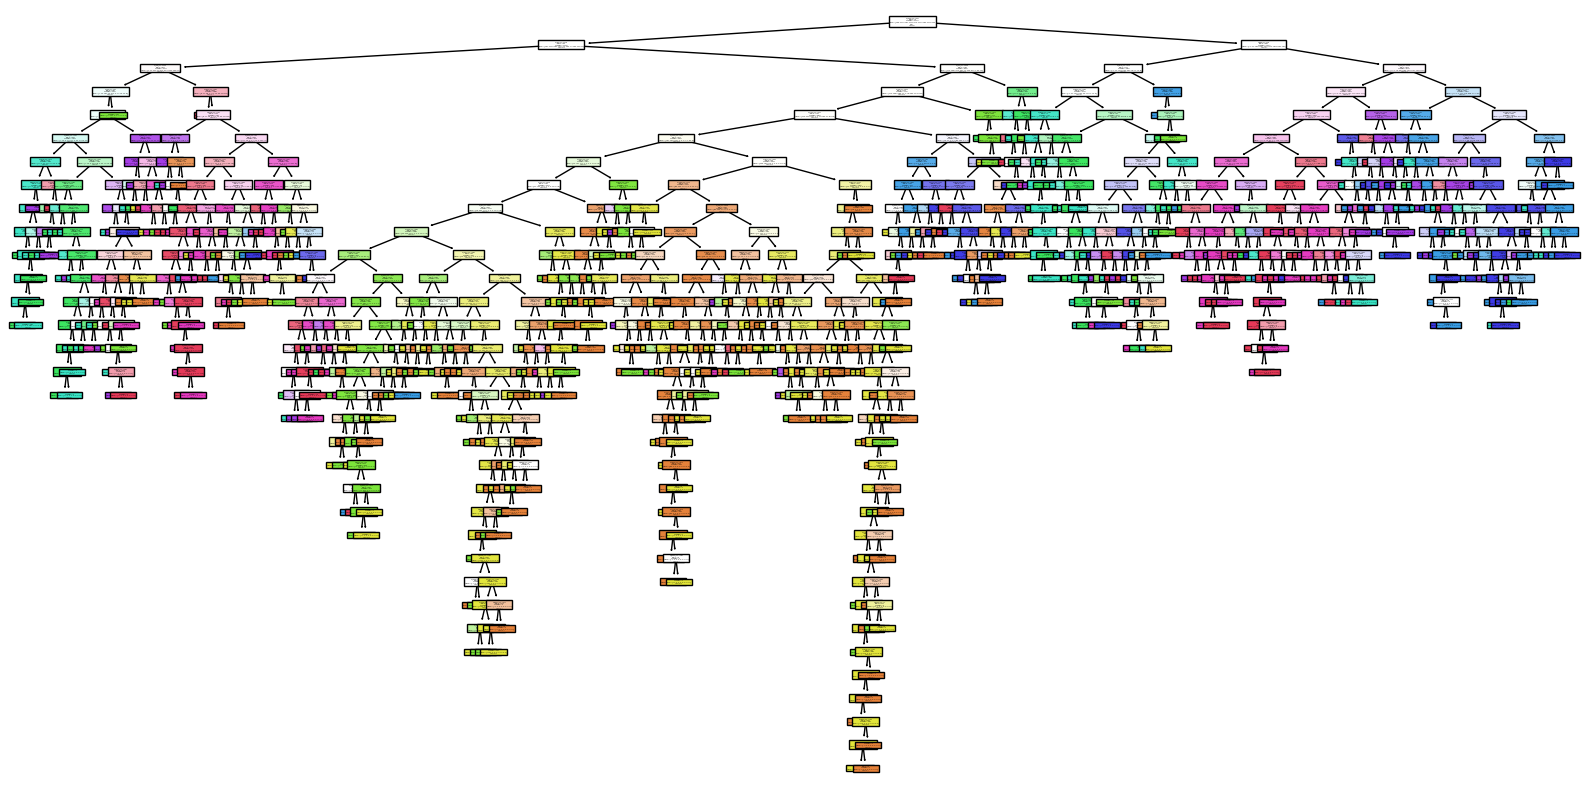

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define and train the decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=None, class_names=selected_letters)
plt.show()